initial route ('A',)
initial route length 1
initial route cost 0.0
('A', 'T', 'D', 'R', 'G', 'E', 'V', 'N')
PATH COST 1434.1950217381673
('A', 'T', 'D', 'R', 'G', 'E', 'V', 'N')
PATH COST 1434.1950217381673


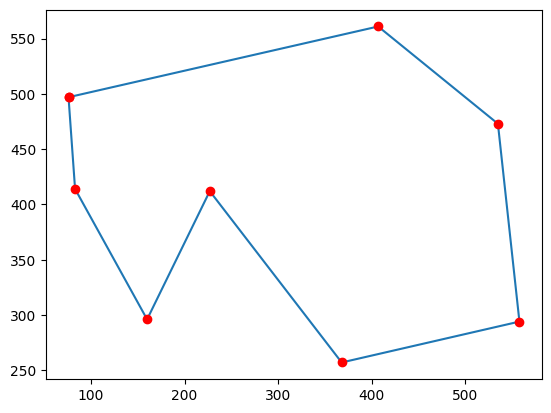

uniform_cost_search:
    6,938 nodes |    2,936 goal | 6206 cost |   2,942 actions | TSP(('A',), None)
    6,938 nodes |    2,936 goal | 6206 cost |   2,942 actions | TOTAL

astar_mst:
    5,859 nodes |    2,277 goal | 6206 cost |   2,283 actions | TSP(('A',), None)
    5,859 nodes |    2,277 goal | 6206 cost |   2,283 actions | TOTAL

astar_mst_weighted:
    4,902 nodes |    1,763 goal | 6206 cost |   1,769 actions | TSP(('A',), None)
    4,902 nodes |    1,763 goal | 6206 cost |   1,769 actions | TOTAL



In [89]:
from search_2 import *
import numpy as np
import matplotlib.pyplot as plt

romania = {'A': ( 76, 497), 'D': (160, 296),
           'E': (558, 294), 'G': (368, 257),
           'N': (407, 561), 'R': (227, 412),
           'T': ( 83, 414), 'V': (535, 473)}

distances = {}
cities = []

# fill out distances
for city in romania.keys():
    distances[city] = {}
    cities.append(city)

for name_1, coordinates_1 in romania.items():
        for name_2, coordinates_2 in romania.items():
            distances[name_1][name_2] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])
            distances[name_2][name_1] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])

def cost(route):
    c = 0
    for i in range(len(route)-1):
        c += distances[route[i]][route[i+1]]
    c += distances[route[0]][route[-1]]
    return c

class TSP(Problem):
    
    def is_goal(self, state):
        return len(state) == 8
    
    def actions(self, state): 
        """The places neighboring `state`."""
        visited = list(state)
        unvisited = [x for x in cities if x not in visited]
        new_states = set()
        for i in unvisited:
            new_state = state
            new_state = new_state + (i,)
            new_states.add(new_state)
        return new_states
        
    def result(self, state, action):
        """Go to the `action` place, if the map says that is possible."""
        return action
    
    def action_cost(self, s, action, s1):
        """The distance (cost) to go from s to s1."""
        return cost(action)

    def h(self, n):
        visited = list(n.state)
        unvisited = [x for x in cities if x not in visited]
        #print("unvisited", unvisited)
        # There are three components to this heurisitc:
        #    1) smallest distance to the nearest unvisited city from the current city
        current_city = n.state[-1]
        if not unvisited:
            return 0
        min_city = unvisited[0]
        min_distance_current = distances[current_city][min_city]
        for c in unvisited:
            if distances[current_city][c] < min_distance_current:
                min_distance_current = distances[current_city][c]
                min_city = c
        #    2) nearest distance from an unvisited city to the start city
        start_city = n.state[0]
        if not unvisited:
            return 0
        min_city = unvisited[0]
        min_distance_start = distances[start_city][min_city]
        for c in unvisited:
            if distances[start_city][c] < min_distance_start:
                min_distance_start = distances[start_city][c]
                min_city = c
        #    3) estimated distance to travel all the unvisited cities 
        #       (MST heuristic used here)
        return min_distance_current + min_distance_start

    def h_weighted(self, n):
        return 2*self.h(n)


initial_route = tuple('A')

print("initial route", initial_route)
print("initial route length", len(initial_route))
print("initial route cost", cost(initial_route))

r0 = TSP(initial = initial_route)
path = path_states(astar_search(r0)) 
print(path[-1])
print("PATH COST", cost(path[-1]))
path = path_states(uniform_cost_search(r0)) 
print(path[-1])
print("PATH COST", cost(path[-1]))

data = []
for p in path[-1]:
    data.append(romania[p])
data.append(data[0])

x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'or')
plt.show()

def astar_mst(problem): return astar_search(problem, h=problem.h)
def astar_mst_weighted(problem): return astar_search(problem, h=problem.h_weighted)

report([uniform_cost_search,
        astar_mst,
        astar_mst_weighted], [r0]) 